<a href="https://colab.research.google.com/github/KAllYANI2003/IPL_Data_Analysis/blob/main/kallyani02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IPL_data.csv')
df.head()

,Player_Name,Team,Country,Age,Role,Matches_Played,Runs_Scored,Batting_Average,Wickets_Taken,Economy_Rate,Price_Crores
0,Virat Kohli,RCB,India,34.0,Batsman,237.0,7263.0,37.2,4.0,8.8,17.50
1,Rohit Sharma,MI,India,36.0,Batsman,227.0,6211.0,30.3,15.0,7.9,16.25
2,MS Dhoni,CSK,India,42.0,Wicket-keeper,250.0,5082.0,39.1,0.0,0.0,15.00
3,Jasprit Bumrah,MI,India,29.0,Bowler,120.0,56.0,4.7,145.0,7.4,14.00
4,Ravindra Jadeja,CSK,India,34.0,All-rounder,226.0,2692.0,26.8,152.0,7.6,13.50


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player_Name      49 non-null     object 
 1   Team             49 non-null     object 
 2   Country          49 non-null     object 
 3   Age              49 non-null     float64
 4   Role             49 non-null     object 
 5   Matches_Played   49 non-null     float64
 6   Runs_Scored      49 non-null     float64
 7   Batting_Average  49 non-null     float64
 8   Wickets_Taken    49 non-null     float64
 9   Economy_Rate     49 non-null     float64
 10  Price_Crores     50 non-null     float64
dtypes: float64(7), object(4)
memory usage: 4.4+ KB
None
             Age  Matches_Played  Runs_Scored  Batting_Average  Wickets_Taken  \
count  49.000000       49.000000    49.000000        49.000000      49.000000   
mean   30.612245      106.897959  1933.877551        23.871429      49.020408   

In [ ]:
features = df[['Runs_Scored','Wickets_Taken','Price_Crores']]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
features = features.dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
print(features.isnull().sum())

Runs_Scored      0
Wickets_Taken    0
Price_Crores     0
dtype: int64


In [ ]:
features = features.dropna()

In [ ]:
df = df.loc[features.index]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

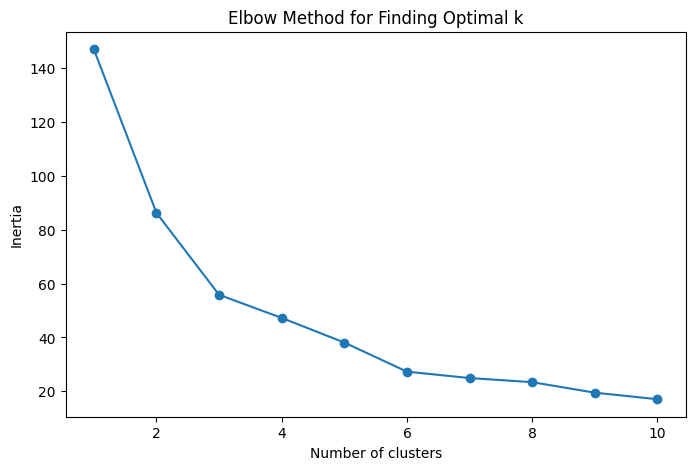

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Finding Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

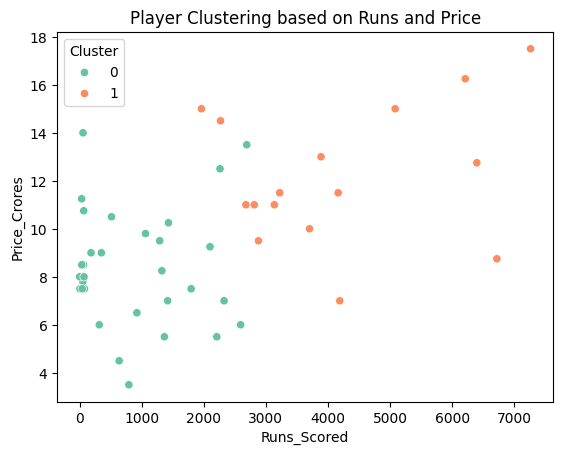

In [ ]:
sns.scatterplot(data=df, x='Runs_Scored', y='Price_Crores', hue='Cluster', palette='Set2')
plt.title('Player Clustering based on Runs and Price')
plt.show()

In [ ]:
valuable_players = df[df['Cluster'] == df['Cluster'].value_counts().idxmin()]
undervalued_players = df[df['Cluster'] == df['Cluster'].value_counts().idxmax()]

In [ ]:
print("\nValuable Players:")
print(valuable_players[['Player_Name', 'Runs_Scored', 'Wickets_Taken', 'Price_Crores']])

print("\nUndervalued Players:")
print(undervalued_players[['Player_Name', 'Runs_Scored', 'Wickets_Taken', 'Price_Crores']])


Valuable Players:
        Player_Name  Runs_Scored  Wickets_Taken  Price_Crores
0       Virat Kohli       7263.0            4.0         17.50
1      Rohit Sharma       6211.0           15.0         16.25
2          MS Dhoni       5082.0            0.0         15.00
5      David Warner       6397.0            0.0         12.75
6       Jos Buttler       3223.0            0.0         11.50
11         KL Rahul       4164.0            0.0         11.50
12   Faf du Plessis       3704.0            0.0         10.00
13     Rishabh Pant       3137.0            0.0         11.00
15    Hardik Pandya       1963.0           57.0         15.00
16    Glenn Maxwell       2679.0           27.0         11.00
17   Shikhar Dhawan       6720.0            4.0          8.75
19     Shreyas Iyer       2881.0            0.0          9.50
21    Ambati Rayudu       4190.0            0.0          7.00
24     Sanju Samson       3888.0            0.0         13.00
36  Quinton de Kock       2813.0            0.0    